!jt -t chesterish
# !jt -r

In [1]:
from genetic_algorithm import *
from numpy.random import default_rng


import binascii
%matplotlib notebook

import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

import copy
from collections import Counter
import pandas as pd

In [2]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 50

## world size
world_size = 10
world_size_x = world_size
world_size_y = world_size

## generations

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 122.26it/s]


<IPython.core.display.Javascript object>


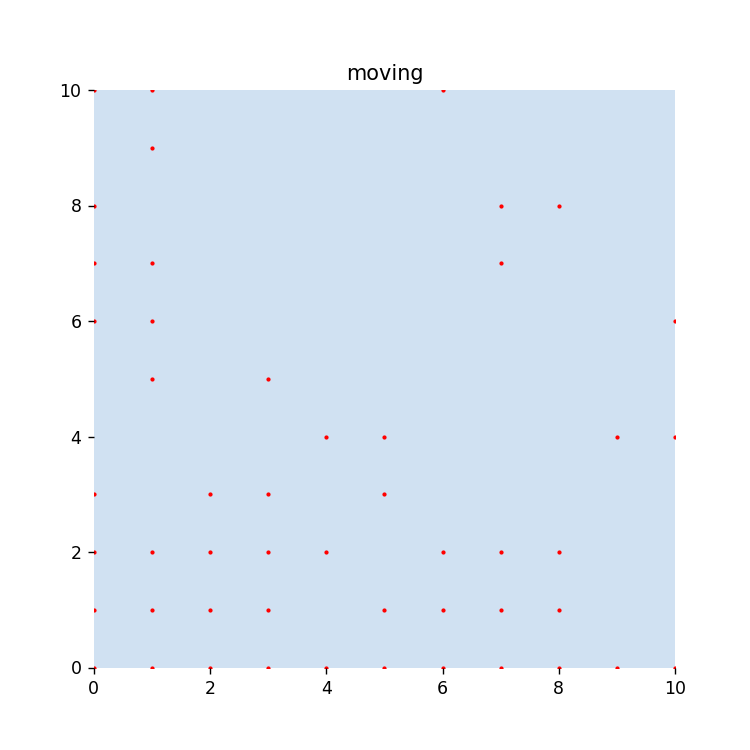

MovieWriter imagemagick unavailable; using Pillow instead.


NameError: name 'nr_individuals' is not defined

In [3]:
for gen_nr in range(100):
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size, result, world_size_x, world_size_y)
        
    else:
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
        result = steps_in_generation(world_size, result, world_size_x, world_size_y)

    coords = generate_dictionary_of_coords(result, world_size+1)

    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c='red', s=2, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)